In [1]:
tle_all=open("/home/limu/Code/Notebook/Astro/alpha/ephem/tle_all.txt").readlines()
tle_arr=[tle_all[4*i+1].replace('-','.').replace('+','.').split()[3:]+tle_all[4*i+2].replace('-','.').split()[2:] for i in range(len(tle_all)//4)]

In [21]:
tle_grb=''.join([t[30:] for t in tle_all[-3:]])
tle_grb=tle_all[-3]+'''1 47959U 21022AD  22095.20310356  .00007240  00000+0  48696-3 0  9997
2 47959  97.5384 356.3123 0022546  40.4460 110.6474 15.06830195 55788''' #from 2022/04/05

In [28]:
from datetime import datetime,timedelta,timezone
import predict
tle_grb=''.join([t[30:] for t in tle_all[-3:]])
qth=(48.7408, -21.2284, 380)
now=datetime.now()
trans=predict.transits(tle_grb,qth,now.timestamp(),(now+timedelta(0,1e6)).timestamp())
trans=[t for t in trans if t.peak()['elevation']>10]

In [29]:
datetime.fromtimestamp(trans[1].start+100,timezone.utc)

datetime.datetime(2022, 4, 5, 22, 14, 26, 444938, tzinfo=datetime.timezone.utc)

In [34]:
import ephem
alpha=ephem.readtle(*(tle_grb.strip()).split('\n'))
obs=ephem.Observer()
obs.lon,obs.lat=str(-qth[1]),str(qth[0])
#obs.date=datetime.utcnow()
obs.date=datetime.fromtimestamp(trans[1].start+100,timezone.utc)

In [42]:
rep=[]
for i in range(0,700,10):
    obs.date=datetime.fromtimestamp(trans[1].start+i,timezone.utc)
    alpha.compute(obs)
    #alpha.ra,alpha.dec
    from math import pi
    rep.append([a/pi*180 for a in [alpha.alt,alpha.az]])

In [39]:
obs.date

44655.42785237197

In [43]:
rep2=[]
for i in range(0,700,10):
    apos=predict.observe(tle_grb,qth,trans[1].start+i)
    rep2.append([apos['elevation'],apos['azimuth']])

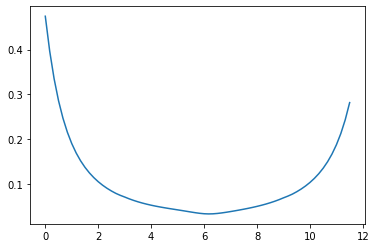

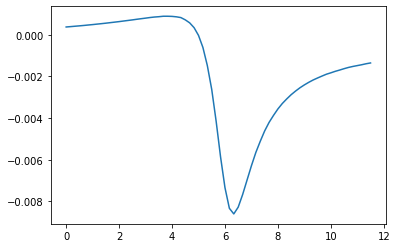

In [47]:
from matplotlib import pyplot as pl
import numpy as np
t=np.r_[:700:10]/60.
rep=np.array(rep)
rep2=np.array(rep2)
%matplotlib inline
pl.figure()
pl.plot(t,rep[:,0]-rep2[:,0])
pl.figure()
pl.plot(t,rep[:,1]-rep2[:,1])

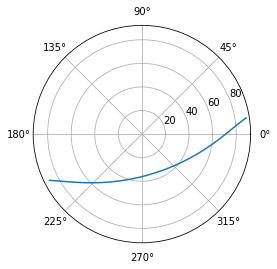

In [53]:
pl.polar(rep[:,1]/180*pi,(90-rep[:,0]))

In [65]:
svalbard=(78,-15.6,0)
toronto=(43.704, 79.369, 143)
UCD=(53.309, 6.225, 20)
trans2=predict.transits(tle_grb,toronto,now.timestamp(),(now+timedelta(0,1e6)).timestamp())
trans2=[t for t in trans2 if t.peak()['elevation']>10]
trans3=predict.transits(tle_grb,UCD,now.timestamp(),(now+timedelta(0,1e6)).timestamp())
trans3=[t for t in trans3 if t.peak()['elevation']>20]
len(trans2),len(trans3),len(trans)

(41, 35, 46)

In [66]:
tend=trans3[10].start
[(datetime.fromtimestamp(t.peak()['epoch'],timezone.utc).isoformat(),t.peak()['elevation']) for t in trans3 if t.start<tend]
#https://network.satnogs.org/observations/?norad=47959&observer=&station=2430&start=&end=&transmitter_mode=
#UCD https://network.satnogs.org/observations/?norad=47959&observer=&station=2271&start=&end=&transmitter_mode=

[('2022-04-05T23:55:05.095352+00:00', 86.64168193923776),
 ('2022-04-06T10:45:15.547008+00:00', 72.22146876798027),
 ('2022-04-06T23:49:38.945915+00:00', 76.97744695665861),
 ('2022-04-07T10:39:48.884471+00:00', 81.93123038423401),
 ('2022-04-07T23:44:12.304780+00:00', 67.9076084544192),
 ('2022-04-08T10:34:22.220502+00:00', 87.98905647647909),
 ('2022-04-08T23:38:45.239208+00:00', 59.7247592419127),
 ('2022-04-09T10:28:55.599503+00:00', 78.07802143948895),
 ('2022-04-09T23:33:17.691449+00:00', 52.53996592772285),
 ('2022-04-10T01:07:40.328989+00:00', 20.818783371925345)]

In [64]:
[(datetime.fromtimestamp(t.peak()['epoch'],timezone.utc).isoformat(),t.peak()['elevation']) for t in trans if t.start<tend]

[('2022-04-05T20:45:26.469706+00:00', 14.831157483021931),
 ('2022-04-05T22:20:26.503716+00:00', 55.20376630468366),
 ('2022-04-06T07:34:05.868831+00:00', 14.892816075749431),
 ('2022-04-06T09:08:19.761016+00:00', 58.686175211212436),
 ('2022-04-06T20:39:57.095100+00:00', 13.086450369599115),
 ('2022-04-06T22:15:01.409219+00:00', 63.491685255555666),
 ('2022-04-07T07:28:43.366241+00:00', 13.3337459855078),
 ('2022-04-07T09:02:52.909727+00:00', 68.00361683938323),
 ('2022-04-07T20:34:27.191241+00:00', 11.486796300374715),
 ('2022-04-07T22:09:35.852994+00:00', 72.97143974274894),
 ('2022-04-08T07:23:20.887758+00:00', 11.909750069086344),
 ('2022-04-08T08:57:26.024840+00:00', 78.46574470464054),
 ('2022-04-08T20:28:56.763075+00:00', 10.010041965219623),
 ('2022-04-08T22:04:09.834865+00:00', 83.39089947587652),
 ('2022-04-08T23:38:09.063641+00:00', 10.265507959608879),
 ('2022-04-09T07:17:58.435064+00:00', 10.601461012471075),
 ('2022-04-09T08:51:59.189953+00:00', 89.600407179283),
 ('2022

In [74]:
zdate=lambda d:datetime.fromtimestamp(d,timezone.utc).isoformat().replace('T',':')[:19]
zdate(trans[1].start),zdate(trans[1].end)

('2022-04-05:22:14:26', '2022-04-05:22:26:25')

In [77]:

[t.peak()['longitude'] for t in trans[:4]]

[39.661436942781876, 16.618454973899, 39.10759654507136, 17.286043406771054]